In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

Insruance Predict Model

In [22]:
train_df = pd.read_csv("raw_data/train.csv")
test_df = pd.read_csv("raw_data/test.csv")
train_df.head()
print(f"Columns Informaiton {train_df.columns}")

Columns Informaiton Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')


In [13]:
print(train_df.dtypes)
non_object_columns = train_df.select_dtypes(exclude=['object'])
print(non_object_columns.columns)
columns_list = non_object_columns.columns
print(columns_list)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicl

In [16]:
# Inital Training regarding all of informaiton
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initally how many data is populates how should pdisplay on this.
def inital_check(train_df):

    non_object_columns_df = train_df.select_dtypes(exclude=['object'])
    # X = non_object_columns_df.drop(columns=["Premium Amount"], errors='ignore')

    X = non_object_columns_df.drop(columns = ["Premium Amount"], errors = 'ignore')
    y = train_df["Premium Amount"]

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
   
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R² Score: {r2_score(y_test, y_pred)}')

inital_check(train_df)

Mean Squared Error: 737046.5730907796
R² Score: 0.013701606485800766


In [17]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [18]:
# How many percentage has null value for it.
train_df.isnull().sum() / train_df.shape[0]


id                      0.000000e+00
Age                     1.558750e-02
Gender                  0.000000e+00
Annual Income           3.745750e-02
Marital Status          1.544083e-02
Number of Dependents    9.139333e-02
Education Level         0.000000e+00
Occupation              2.983958e-01
Health Score            6.173000e-02
Location                0.000000e+00
Policy Type             0.000000e+00
Previous Claims         3.033575e-01
Vehicle Age             5.000000e-06
Credit Score            1.149017e-01
Insurance Duration      8.333333e-07
Policy Start Date       0.000000e+00
Customer Feedback       6.485333e-02
Smoking Status          0.000000e+00
Exercise Frequency      0.000000e+00
Property Type           0.000000e+00
Premium Amount          0.000000e+00
dtype: float64

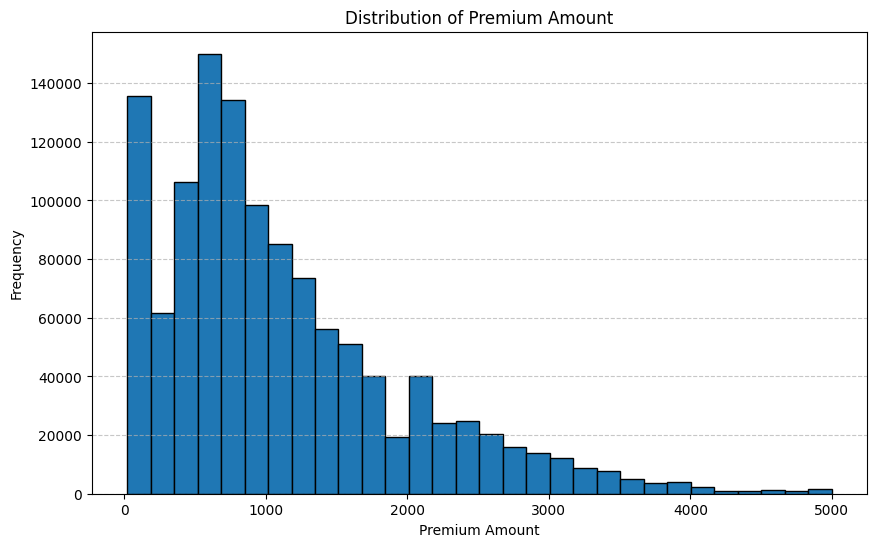

In [19]:
# Target value checking on distribution how data has been distributed.
import matplotlib.pyplot as plt

# Plot histogram for Premium Amount
plt.figure(figsize=(10, 6))
plt.hist(train_df['Premium Amount'], bins=30, edgecolor='black')
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
def populate_each_object_unique_values(train_df):
    object_columns_df = train_df.select_dtypes(exclude=['float64', 'int64'])
    unique_values_dict = {}
    for column in object_columns_df.columns:
        unique_values_dict[column] = object_columns_df[column].unique().tolist()
    
    return unique_values_dict
train_df = pd.read_csv("raw_data/train.csv")

train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date']).dt.date
unique_values = populate_each_object_unique_values(train_df)
# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}: {values}")

Column: Gender: ['Female', 'Male']
Column: Marital Status: ['Married', 'Divorced', 'Single', nan]
Column: Education Level: ["Bachelor's", "Master's", 'High School', 'PhD']
Column: Occupation: ['Self-Employed', nan, 'Employed', 'Unemployed']
Column: Location: ['Urban', 'Rural', 'Suburban']
Column: Policy Type: ['Premium', 'Comprehensive', 'Basic']
Column: Policy Start Date: [datetime.date(2023, 12, 23), datetime.date(2023, 6, 12), datetime.date(2023, 9, 30), datetime.date(2024, 6, 12), datetime.date(2021, 12, 1), datetime.date(2022, 5, 20), datetime.date(2020, 2, 21), datetime.date(2022, 8, 8), datetime.date(2020, 12, 14), datetime.date(2020, 8, 2), datetime.date(2021, 5, 12), datetime.date(2020, 3, 22), datetime.date(2021, 10, 28), datetime.date(2023, 1, 20), datetime.date(2021, 8, 14), datetime.date(2020, 10, 17), datetime.date(2024, 4, 22), datetime.date(2020, 12, 27), datetime.date(2021, 10, 13), datetime.date(2020, 6, 25), datetime.date(2024, 6, 25), datetime.date(2023, 7, 31), dat

In [38]:
train_df = pd.read_csv("raw_data/train.csv")

mapping_dict = {
    'Gender': {'Female': 0, 'Male': 1},
    'Marital Status': {'Married': 0, 'Divorced': 1, 'Single': 2},
    'Education Level': {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3},
    'Occupation': {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2},
    'Location': {'Urban': 0, 'Suburban': 1, 'Rural': 2},
    'Smoking Status': {'No': 0, 'Yes': 1},
    'Exercise Frequency': {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3},
    'Property Type': {'House': 0, 'Apartment': 1, 'Condo': 2}
}

# 매핑 적용 함수
def apply_mapping(df, mapping):
    for column, mapping_values in mapping.items():
        if column in df.columns:
            df[column] = df[column].map(mapping_values)
    return df

# 매핑 적용
train_df = apply_mapping(train_df, mapping_dict)

# 결과 확인
print(train_df.head())

def preapre_clean_data(train_df):
    print(f"Original Shape {train_df.shape}")
    target_df = apply_mapping(train_df, mapping_dict)

    target_df = target_df.dropna()
    print(f"After Shape {target_df.shape}")
    return target_df

target_df = preapre_clean_data(train_df)
target_df.head()

   id   Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0   0  19.0       0        10049.0             0.0                   1.0   
1   1  39.0       0        31678.0             1.0                   3.0   
2   2  23.0       1        25602.0             1.0                   3.0   
3   3  21.0       1       141855.0             0.0                   2.0   
4   4  21.0       1        39651.0             2.0                   1.0   

   Education Level  Occupation  Health Score  Location  ... Previous Claims  \
0                1         1.0     22.598761         0  ...             2.0   
1                2         NaN     15.569731         2  ...             1.0   
2                0         1.0     47.177549         1  ...             1.0   
3                1         NaN     10.938144         2  ...             1.0   
4                1         1.0     20.376094         2  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy St

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
